# Topic Identification with Tf-idf
 
Here we aim to identify and visualize the words that characterize a text within a collection of texts. Tf–idf, short for term frequency–inverse document frequency, is an information retrieval technique, that reflect how important a word is to a document in a collection of documents. A tf-idf value of 0 indicates generic terms, higher values indicate words that uniquely identify a given document.  

In [1]:
%%capture
!pip install wordcloud

In [2]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os 
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [3]:
# Upload your data as a .txt files to the data folder 
reference = dict()
corpus = []

for filepath in glob.glob("data/*.txt"):
    basename = os.path.basename(filepath).replace('.txt', '')
    with open(filepath, 'r') as f:
        content = f.read().replace("\n", '')
        reference[basename] = content
        corpus.append(content)

In [4]:
# Create a Tfidf matrix
vectorizer = TfidfVectorizer(stop_words='english',     #
                             ngram_range = (1,1),      #
                             max_df = .6,              #
                             min_df = .01)             #

X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,000,108,11,1863,20,2017,225,400,60,abandoned,abandonment,ability,abraham,abuse,accomplishment,account,accounting,accumulate,achieve,achieved,act,acted,action,acts,add,administration,advance,advancing,adversaries,affairs,affirm,afford,afghanistan,afresh,age,ages,aggression,ago,agree,ahead,...,weeping,welfare,went,west,whip,whirlwind,whisper,white,wield,willing,willingness,wind,winds,windswept,winning,winter,wisdom,wisely,wives,woman,wonderful,wondering,wonders,word,worked,workers,working,works,worldly,worn,worry,worship,wounded,write,wrong,wrongs,wrote,year,yesterday,yielding
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042969,0.000000,0.000000,0.000000,0.042969,0.000000,0.000000,0.042969,0.042969,0.000000,0.000000,0.042969,0.000000,0.042969,0.000000,0.000000,0.000000,0.085938,0.000000,0.000000,0.033877,0.000000,0.000000,0.000000,0.128907,0.033877,0.000000,0.000000,0.000000,0.000000,0.042969,0.000000,0.042969,0.000000,...,0.000000,0.000000,0.042969,0.000000,0.000000,0.085938,0.000000,0.000000,0.000000,0.000000,0.000000,0.042969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042969,0.000000,0.000000,0.000000,0.000000,0.000000,0.042969,0.000000,0.033877,0.000000,0.033877,0.000000,0.000000,0.042969
1,0.032004,0.032004,0.032004,0.032004,0.000000,0.000000,0.000000,0.064008,0.000000,0.000000,0.000000,0.000000,0.032004,0.000000,0.000000,0.000000,0.032004,0.000000,0.000000,0.000000,0.050465,0.032004,0.000000,0.000000,0.064008,0.000000,0.000000,0.000000,0.025232,0.000000,0.000000,0.000000,0.000000,0.032004,0.000000,0.050465,0.000000,0.075697,0.000000,0.064008,...,0.032004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025232,0.000000,0.025232,0.000000,0.000000,0.000000,0.000000,0.000000,0.050465,0.000000,0.000000,0.032004,0.025232,0.000000,0.032004,0.000000,0.032004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032004,0.032004,0.000000,0.064008,0.000000,0.032004,0.025232,0.075697,0.032004,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.045494,0.045494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071736,0.000000,0.000000,0.045494,0.000000,0.000000,0.000000,0.045494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.045494,0.000000,0.000000,0.000000,0.000000,0.000000,0.035868,0.000000,0.000000,0.000000,0.000000,0.000000,0.045494,0.090989,0.000000,0.045494,0.000000,0.000000,0.000000,0.045494,0.000000,0.000000,0.000000,0.000000,0.071736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034915,0.034915,0.000000,0.034915,0.000000,0.000000,0.000000,0.034915,0.000000,0.000000,0.034915,0.000000,0.027528,0.000000,0.027528,0.000000,0.000000,0.000000,0.027528,0.034915,0.027528,0.000000,0.000000,0.055055,0.034915,0.000000,0.069831,0.027528,0.000000,0.027528,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.069831,0.034915,0.000000,0.034915,0.000000,0.034915,0.055055,0.069831,0.000000,0.034915,0.000000,0.000000,0.055055,0.000000,0.034915,0.000000,0.027528,0.000000,0.000000,0.034915,0.000000,0.034915,0.055055,0.000000,0.034915,0.034915,0.034915,0.000000,0.000000,0.000000,0.000000,0.027528,0.000000,0.000000,0.055055,0.000000,0.000000


In [5]:
# Find the top words in each document
top_dict = {}
data = df.transpose()
data.columns = reference.keys()

for i, c in enumerate(data.columns):
    top = data.loc[:,c].sort_values(ascending=False).head(30)
    top_dict[data.columns[i]]= list(zip(top.index, top.values))

# Print the top 15 words said by each President
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bush
story, civility, freedom, ideals, best, duty, character, commitment, compassion, affirm, times, called, principles, deep
---
biden
democracy, story, days, truth, virus, centuries, soul, say, lost, ve, better, don, lies, objects
---
trump
protected, dreams, right, bring, wealth, foreign, obama, countries, left, ve, capital, millions, factories, victories
---
obama
generation, greater, hard, men, crisis, journey, man, carried, father, economy, say, force, freedom, shall
---


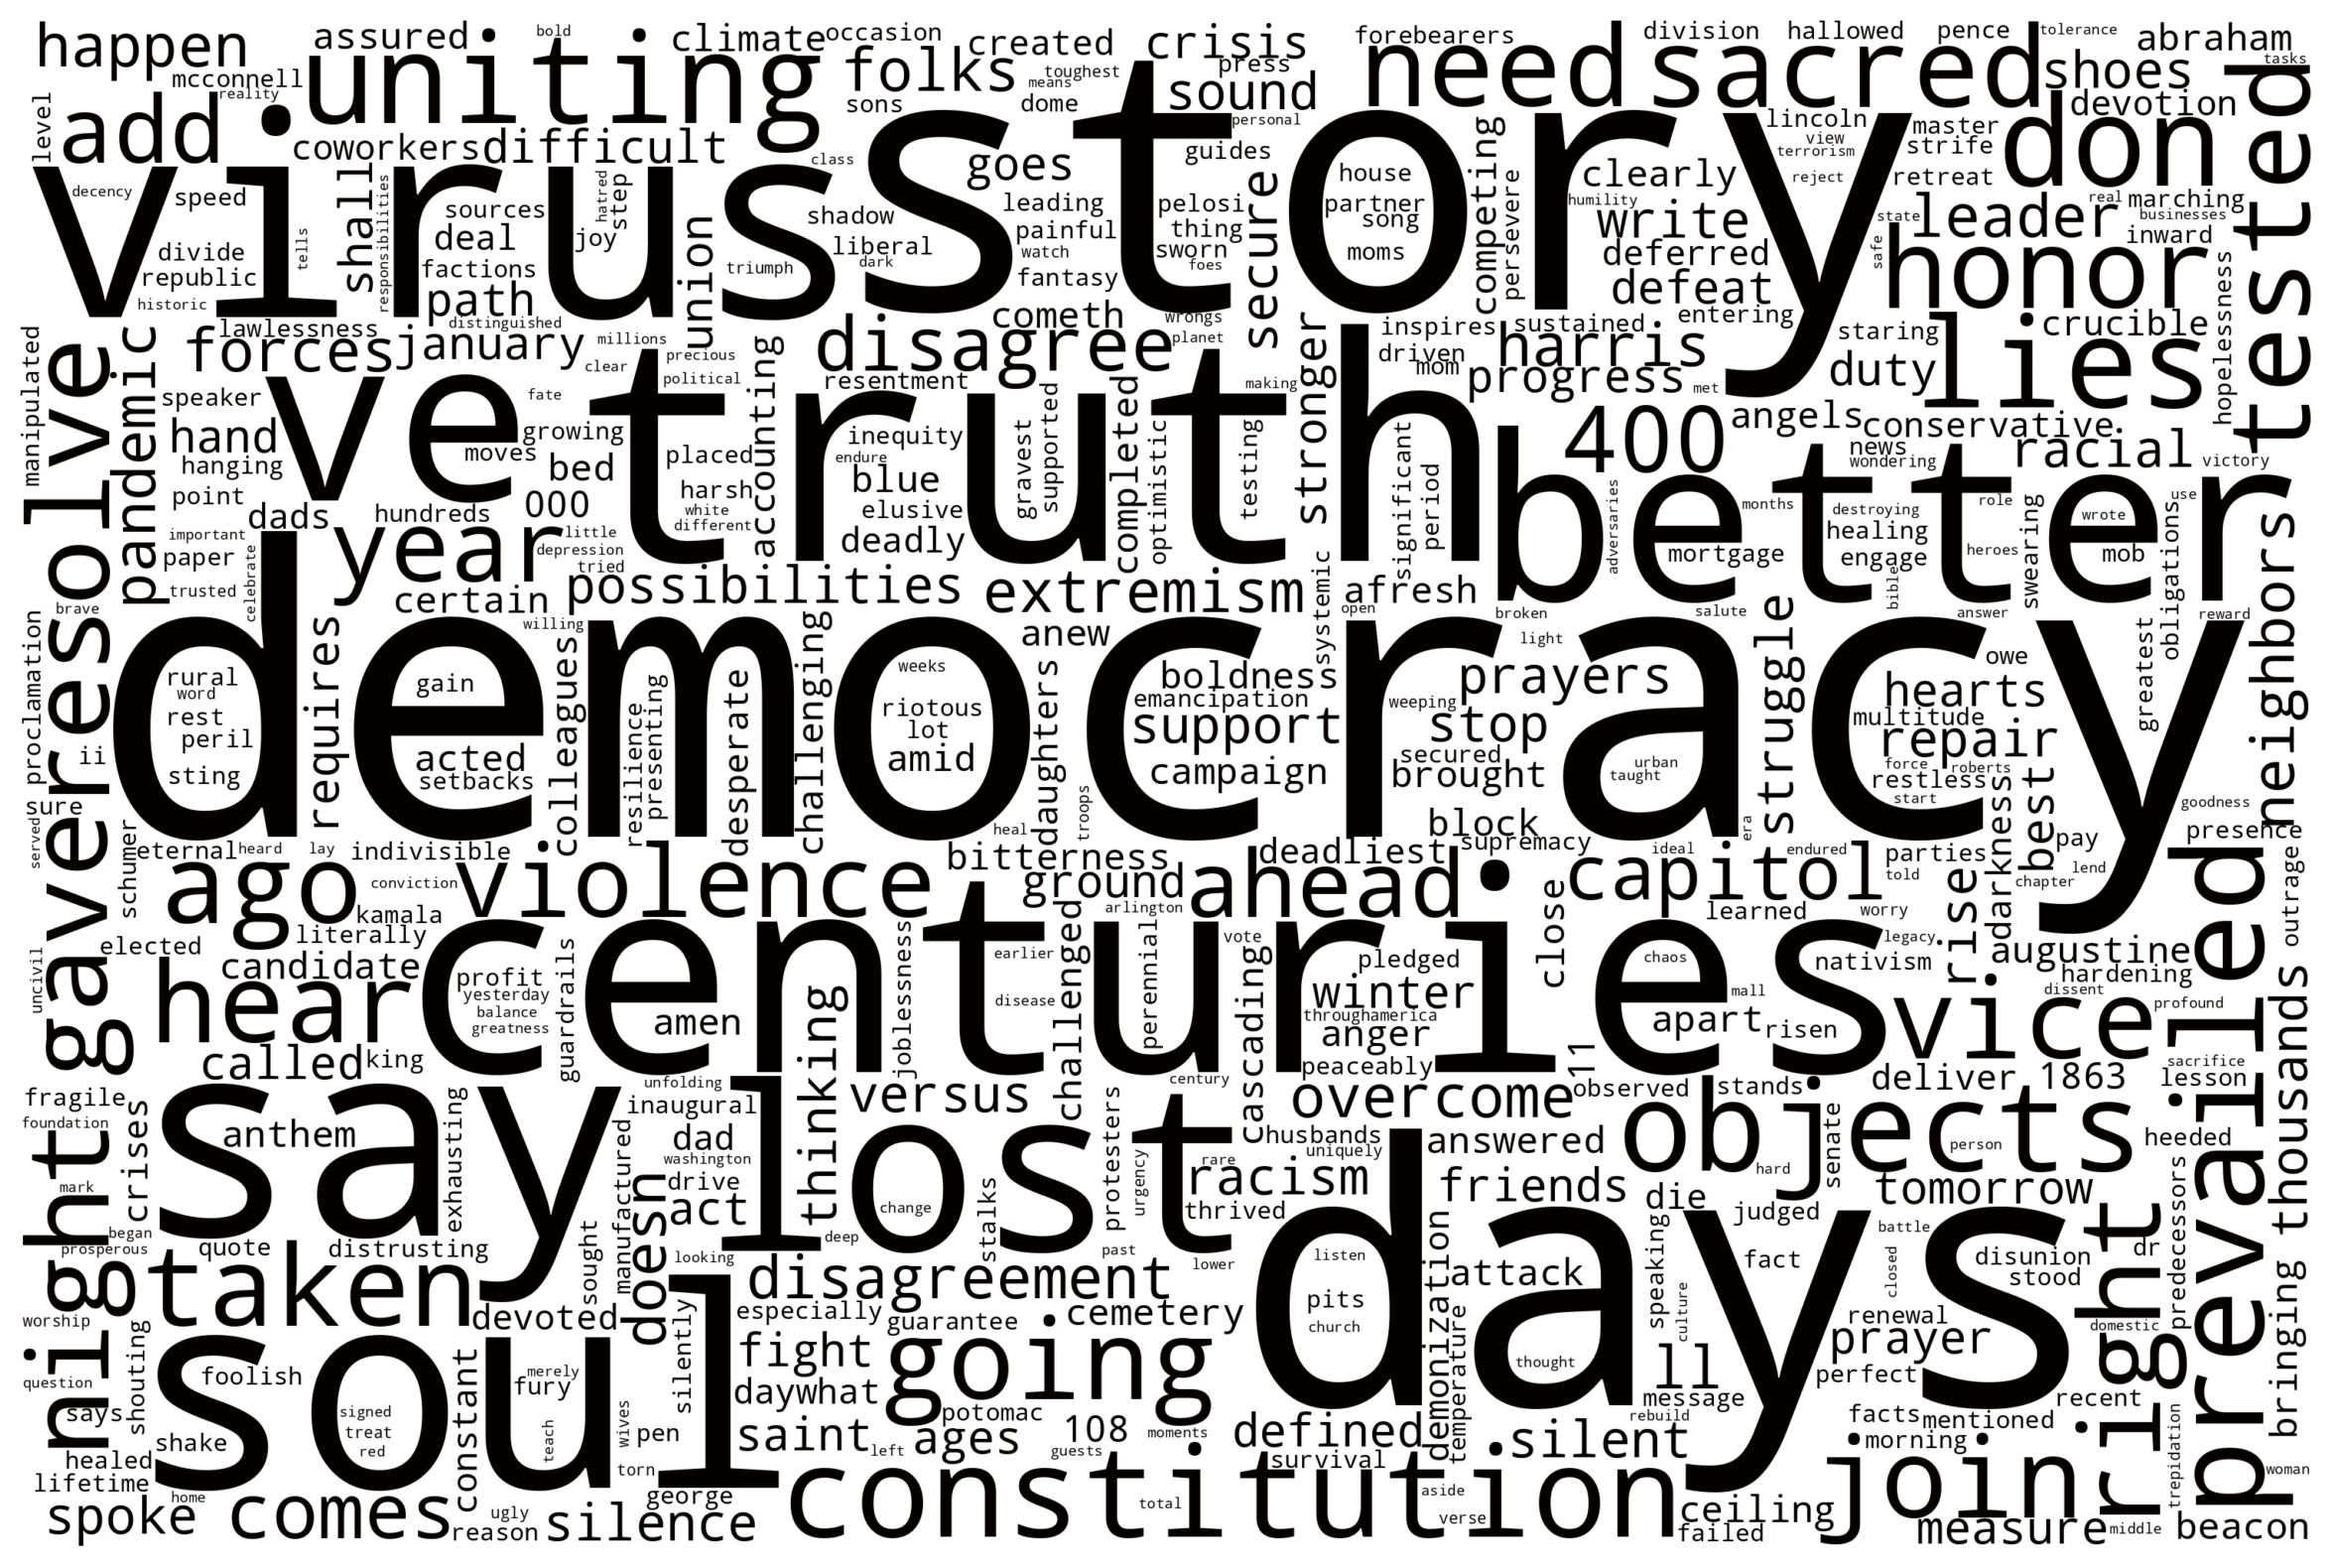

In [6]:
# Prep TF-IDF Matrix for Word Clouds
data = df.transpose()
data.columns = reference.keys()

# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wc = WordCloud(background_color="white",                  # select background color
               width=3000,                                # set wight
               height=2000,                               # set height
               max_words=500)\
            .generate_from_frequencies(data['biden'])     # set max amount of words
                                                          # choose column for wordcloud
    
wc.recolor(color_func = black_color_func)                 # set the word color to black
plt.figure(figsize=[15,10])                               # set the figsize
plt.imshow(wc, interpolation="bilinear");                 # plot the wordcloud
plt.axis("off")                                           # remove plot axes
plt.savefig('wordcloud.png')                              # pick neame and save as png 